### 1.1.2.1 回归

Ridge 通过对系数的大小事假惩罚来解决普通最小二乘的一些问题。岭系数最小化一个带惩罚项的残差平方和：
其中，α≥0是控制收缩量的复杂性参数，α值越大，收缩量越大，这样，系数对共线性的鲁棒性就更强了。

与其他线性模型一样，Ridge 用 fit 方法完成拟合，并将模型系数w存储在其 coef_ 成员中：

In [2]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])

Ridge(alpha=0.5)

In [3]:
reg.coef_

array([0.34545455, 0.34545455])

In [4]:
reg.intercept_

np.float64(0.13636363636363638)

### 绘制正则化函数的岭系数图

该图显示了估计器系数的共线性的影像

岭回归是在这个例子中使用的估计器。每种颜色都表示系数向量的不同特征，这将显示为正则化参数的函数。

此示例还显示了将岭回归应用于高度病态矩阵的有效性。对于这样的矩阵，目标变量的微小变化会导致计算权重的巨大差异。在这种情况下，设置一定的正则化（Alpha）以减少这种变化（噪声）是有用的。

当alpha很大时，正则化效应控制平方损失函数，系数趋于零。在路径的末尾，当alpha趋于零，解趋于普通的最小二乘时，系数会出现很大的震荡。在实践中，有必要对alpha进行调优，以便在两者之间保持平衡

In [6]:
print(__doc__)

Automatically created module for IPython interactive environment


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [10]:
X = 1. / (np.arange(1,11) + np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

In [23]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

In [25]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [26]:
coefs

[array([   2.64506205,  -27.60371111,    7.9928959 ,  133.67547582,
          18.04320779, -123.85501302, -175.62005451, -113.78636418,
          45.15379001,  274.02304794]),
 array([   2.7749527 ,  -30.12097847,   17.90676634,  125.42566121,
          10.71783822, -122.86633223, -168.64641422, -106.5963249 ,
          46.70072643,  265.22300772]),
 array([   2.89641318,  -32.48098578,   27.2187549 ,  117.65911189,
           3.83379714, -121.92542566, -162.07887015,  -99.8316489 ,
          48.15083193,  256.9354759 ]),
 array([   3.00959629,  -34.68697725,   35.94236984,  110.36414198,
          -2.61960608, -121.03068351, -155.90692465,  -93.48138266,
          49.50638542,  249.14681034]),
 array([   3.11468946,  -36.74289292,   44.09395071,  103.52651454,
          -8.65488139, -120.18030119, -150.11801753,  -87.53260874,
          50.77013015,  241.84083815]),
 array([   3.21190953,  -38.65326906,   51.69226566,   97.1298894 ,
         -14.28640386, -119.37202105, -144.69784495,

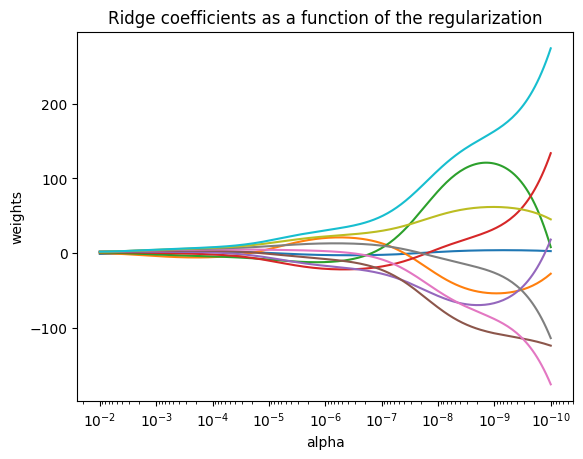

In [27]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 1.1.2.4 设置正则化参数：广义交叉验证

RidgeCV 通过内置的 alpha 参数的控制交叉验证来实现岭回归。该对象与 GridSearchCV 的使用方法相同，只是它默认为 Generalized Cross-Calidation（广义交叉验证GCV），这是一种有效的留一交叉验证方法。

In [30]:
import numpy as np
from sklearn import linear_model

In [36]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [37]:
reg.alpha_

np.float64(0.01)

### 使用 RidgeClassifier 分类器

In [81]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score

In [129]:
# 生成分类数据集
X, y = make_classification(n_samples=1000, n_features=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# 初始化并训练模型
clf = RidgeClassifier(alpha=100)  # alpha 是正则化强度
clf.fit(X_train, y_train)

RidgeClassifier(alpha=100)

In [131]:
# 预测并评估
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.2f}")

准确率: 0.88


In [124]:
# 查看模型系数
print("权重系数:", clf.coef_)
print("偏置项:", clf.intercept_)

权重系数: [ 6.43560680e-03 -8.03397669e-03 -3.55276628e-03 -9.66428736e-03
  8.70894300e-03 -1.69289509e-02 -4.09027350e-03 -3.98581061e-04
  1.22161888e-02 -7.38961969e-03 -8.17993628e-02 -6.20097840e-03
 -1.04354578e-02 -1.72223171e-02  1.91834591e-03 -1.00174022e-02
 -1.18511762e-01 -1.27131190e-02  5.12367076e-03 -2.00511529e-02
  1.24237354e-02 -6.72397106e-03  2.34732220e-03  1.33324082e-02
  3.31490430e-04 -3.38198979e-03 -1.48241599e-02  1.00000054e-02
  1.21322139e-02 -3.79046897e-03 -1.24267503e-02 -7.30442896e-03
 -4.19365457e-03 -3.14667736e-03 -3.97536889e-03 -5.44842236e-03
 -2.30294127e-03 -1.22029596e-02  5.86204431e-03  3.49353177e-03
  1.57085272e-02  1.20837029e-02 -4.50243268e-03  5.02099416e-03
  1.87659521e-02  2.03116201e-02 -1.58420056e-02  4.01728725e-03
  4.14345729e-03  2.24514059e-02  3.85082643e-03 -1.49166841e-03
 -1.96051362e-02 -4.97121721e-03 -8.14169084e-03 -8.03443070e-04
 -1.04496316e-03  8.27125780e-03 -8.82001420e-03  1.31895742e-03
  2.43420514e-01  1

In [125]:
reg = RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
reg.alpha_

np.float64(100.0)

In [128]:
alphas=np.logspace(-6, 6, 13)
alphas


array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])